In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# train test split
from sklearn.model_selection import train_test_split
# regression model
from sklearn.linear_model import LinearRegression
# regression analysis
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import Lasso

# Data Cleaning

In [2]:
wage_data = pd.read_csv('data/usa_00006.csv.gz', compression="gzip")
wage_data

,REGION,SEX,AGE,MARST,RACE,RACED,HCOVANY,EDUC,EDUCD,DEGFIELD,DEGFIELDD,EMPSTAT,EMPSTATD,INCWAGE,INCWELFR,INCINVST,PWSTATE2,TRANTIME
0,32,2,85,5,8,801,2,7,71,0,0,3,30,0,0,0,0,0
1,32,1,51,5,1,100,2,6,64,0,0,3,30,12500,0,0,0,0
2,32,2,36,6,2,200,2,2,26,0,0,3,30,16400,0,0,0,0
3,32,1,74,6,2,200,2,0,2,0,0,3,30,0,0,0,0,0
4,32,1,49,4,1,100,1,7,71,0,0,3,30,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3373373,41,1,33,6,1,100,2,10,101,11,1199,1,10,52000,0,0,56,10
3373374,41,2,27,6,1,100,2,10,101,23,2305,1,10,43000,0,0,56,45
3373375,41,1,1,6,1,100,2,0,1,0,0,0,0,999999,99999,999999,0,0
3373376,41,1,66,1,1,100,2,6,63,0,0,1,10,162000,0,0,56,10


In [3]:
wage_data = wage_data.drop(columns=['RACED', 'EDUCD','DEGFIELDD', 'EMPSTATD', 'PWSTATE2'])
wage_data

,REGION,SEX,AGE,MARST,RACE,HCOVANY,EDUC,DEGFIELD,EMPSTAT,INCWAGE,INCWELFR,INCINVST,TRANTIME
0,32,2,85,5,8,2,7,0,3,0,0,0,0
1,32,1,51,5,1,2,6,0,3,12500,0,0,0
2,32,2,36,6,2,2,2,0,3,16400,0,0,0
3,32,1,74,6,2,2,0,0,3,0,0,0,0
4,32,1,49,4,1,1,7,0,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3373373,41,1,33,6,1,2,10,11,1,52000,0,0,10
3373374,41,2,27,6,1,2,10,23,1,43000,0,0,45
3373375,41,1,1,6,1,2,0,0,0,999999,99999,999999,0
3373376,41,1,66,1,1,2,6,0,1,162000,0,0,10


Removed several columns that were either redundant or had more informative counterparts in the dataset:
- ‘RACED’: This column was dropped because 'RACE' variable was used.
- ‘EDUCD’: This column was dropped because 'EDUC' variable was used
- ‘DEGFIELDD’: This column was dropped because 'DEGFIELD' variable was used
- ‘EMPSTATD’: This column was dropped because 'EMPSTAT' variable was used
- ‘PWSTATE2’: This column was dropped because 'REGION' variable was used

#### Data Code

##### Race Codes: 

1	White	
2	Black/African American	
3	American Indian or Alaska Native	
4	Chinese	
5	Japanese	
6	Other Asian or Pacific Islander	
7	Other race, nec	
8	Two major races	
9	Three or more major races

##### HCOVANY Codes: 

1	No health insurance coverage	
2	With health insurance coverage

##### EDUC codes:

00	N/A or no schooling	X
01	Nursery school to grade 4	X
02	Grade 5, 6, 7, or 8	X
03	Grade 9	X
04	Grade 10	X
05	Grade 11	X
06	Grade 12	X
07	1 year of college	X
08	2 years of college	X
09	3 years of college	·
10	4 years of college	X
11	5+ years of college	X
99	Missing


##### DEGFIELD Codes: 

00	N/A	X
11	Agriculture	X
13	Environment and Natural Resources	X
14	Architecture	X
15	Area, Ethnic, and Civilization Studies	X
19	Communications	X
20	Communication Technologies	X
21	Computer and Information Sciences	X
22	Cosmetology Services and Culinary Arts	X
23	Education Administration and Teaching	X
24	Engineering	X
25	Engineering Technologies	X
26	Linguistics and Foreign Languages	X
29	Family and Consumer Sciences	X
32	Law	X
33	English Language, Literature, and Composition	X
34	Liberal Arts and Humanities	X
35	Library Science	X
36	Biology and Life Sciences	X
37	Mathematics and Statistics	X
38	Military Technologies	X
40	Interdisciplinary and Multi-Disciplinary Studies (General)	X
41	Physical Fitness, Parks, Recreation, and Leisure	X
48	Philosophy and Religious Studies	X
49	Theology and Religious Vocations	X
50	Physical Sciences	X
51	Nuclear, Industrial Radiology, and Biological Technologies	X
52	Psychology	X
53	Criminal Justice and Fire Protection	X
54	Public Affairs, Policy, and Social Work	X
55	Social Sciences	X
56	Construction Services	X
57	Electrical and Mechanic Repairs and Technologies	X
58	Precision Production and Industrial Arts	·
59	Transportation Sciences and Technologies	X
60	Fine Arts	X
61	Medical and Health Sciences and Services	X
62	Business	X
64	History


##### PWSTATE2:

00	N/A	X
01	Alabama	X
02	Alaska	X
04	Arizona	X
05	Arkansas	X
06	California	X
08	Colorado	X
09	Connecticut	X
10	Delaware	X
11	District of Columbia	X
12	Florida	X
13	Georgia	X
15	Hawaii	X
16	Idaho	X
17	Illinois	X
18	Indiana	X
19	Iowa	X
20	Kansas	X
21	Kentucky	X
22	Louisiana	X
23	Maine	X
24	Maryland	X
25	Massachusetts	X
26	Michigan	X
27	Minnesota	X
28	Mississippi	X
29	Missouri	X
30	Montana	X
31	Nebraska	X
32	Nevada	X
33	New Hampshire	X
34	New Jersey	X
35	New Mexico	X
36	New York	X
37	North Carolina	X
38	North Dakota	X
39	Ohio	X
40	Oklahoma	X
41	Oregon	X
42	Pennsylvania	X
44	Rhode Island	X
45	South Carolina	X
46	South Dakota	X
47	Tennessee	X
48	Texas	X
49	Utah	X
50	Vermont	X
51	Virginia	X
53	Washington	X
54	West Virginia	X
55	Wisconsin	X
56	Wyoming	X

##### State group codes (UR samples)	
61	Maine-New Hampshire-Vermont	·
62	Massachusetts-Rhode Island	·
63	Minnesota-Iowa-Missouri-Kansas-Nebraska-S.Dakota-N.Dakota	·
64	Maryland-Delaware	·
65	Montana-Idaho-Wyoming	·
66	Utah-Nevada	·
67	Arizona-New Mexico	·
68	Alaska-Hawaii	·
72	Puerto Rico	X
73	U.S. outlying area	·
74	United States (1980 Puerto Rico samples)	·
80	Abroad	·
81	Europe	X
82	Eastern Asia	·
83	Other Asia, n.s. (2003-2005 ACS); South Central, South East, and Western Asia (2000-2002 ACS)	X
84	Mexico	X
85	Other Americas	X
86	Other, n.e.c.	X
87	Iraq	·
88	Canada	·
90	Confidential	·
99	Not reported

In [4]:
# Remove rows where INCWAGE is 999999 (N/A)
# revome rows where income is na
wage_data.dropna(subset=['INCWAGE'], inplace=True)
wage_data = wage_data[wage_data['INCWAGE'] != 999999]
wage_data

,REGION,SEX,AGE,MARST,RACE,HCOVANY,EDUC,DEGFIELD,EMPSTAT,INCWAGE,INCWELFR,INCINVST,TRANTIME
0,32,2,85,5,8,2,7,0,3,0,0,0,0
1,32,1,51,5,1,2,6,0,3,12500,0,0,0
2,32,2,36,6,2,2,2,0,3,16400,0,0,0
3,32,1,74,6,2,2,0,0,3,0,0,0,0
4,32,1,49,4,1,1,7,0,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3373372,41,1,55,6,1,2,6,0,1,21800,0,0,13
3373373,41,1,33,6,1,2,10,11,1,52000,0,0,10
3373374,41,2,27,6,1,2,10,23,1,43000,0,0,45
3373376,41,1,66,1,1,2,6,0,1,162000,0,0,10


Removed rows where the INCWAGE (income wage) column had missing values. Filtered out rows where INCWAGE was coded as 999999, which in this dataset signifies that the wage information is not available (N/A).


In [5]:
wage_data.describe()

,REGION,SEX,AGE,MARST,RACE,HCOVANY,EDUC,DEGFIELD,EMPSTAT,INCWAGE,INCWELFR,INCINVST,TRANTIME
count,2.809390e+06,2.809390e+06,2.809390e+06,2.809390e+06,2.809390e+06,2.809390e+06,2.809390e+06,2.809390e+06,2.809390e+06,2.809390e+06,2.809390e+06,2.809390e+06,2.809390e+06
mean,2.839617e+01,1.513144e+00,4.975876e+01,3.123662e+00,2.414484e+00,1.921980e+00,7.418151e+00,1.414194e+01,1.855315e+00,3.521161e+04,4.859950e+01,3.015792e+03,1.224302e+01
std,1.027669e+01,4.998273e-01,1.974501e+01,2.240868e+00,2.509463e+00,2.682033e-01,2.467408e+00,2.257371e+01,9.777120e-01,6.538914e+04,6.935578e+02,2.496205e+04,2.030420e+01
min,1.100000e+01,1.000000e+00,1.600000e+01,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-3.000000e+03,0.000000e+00
25%,2.100000e+01,1.000000e+00,3.300000e+01,1.000000e+00,1.000000e+00,2.000000e+00,6.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.100000e+01,2.000000e+00,5.000000e+01,2.000000e+00,1.000000e+00,2.000000e+00,7.000000e+00,0.000000e+00,1.000000e+00,9.000000e+03,0.000000e+00,0.000000e+00,0.000000e+00
75%,3.300000e+01,2.000000e+00,6.600000e+01,6.000000e+00,2.000000e+00,2.000000e+00,1.000000e+01,2.400000e+01,3.000000e+00,5.000000e+04,0.000000e+00,0.000000e+00,2.000000e+01
max,4.200000e+01,2.000000e+00,9.700000e+01,6.000000e+00,9.000000e+00,2.000000e+00,1.100000e+01,6.400000e+01,3.000000e+00,7.910000e+05,3.000000e+04,4.680000e+05,1.580000e+02


#### Winsorize data 

In [6]:
def winsorize_series(series, lower_percentile=0.01, upper_percentile=0.99):
    lower_limit = series.quantile(lower_percentile)
    upper_limit = series.quantile(upper_percentile)
    return series.clip(lower=lower_limit, upper=upper_limit)

# Assuming your data is in a DataFrame named wage_data
# Explicitly use .loc to avoid SettingWithCopyWarning
wage_data = wage_data.copy()  # Ensure it's a standalone DataFrame
wage_data.loc[:, 'INCWAGE'] = winsorize_series(wage_data['INCWAGE'])

Implemented winsorization on  INCWAGE variable to reduce the impact of outliers on our analysis. winsorize_series function capped extreme wage values at the 1st and 99th percentiles. This transformation replaces values below the lower percentile with the 1st percentile value and above the upper percentile with the 99th percentile value.

The below graph describes the wage = 0 distribution against age to decide if we will drop 0 wages. The result of the below graph indicates that there are more occurrences of 0 wages when the subject is less than 20 years old (in school) or when the subject is above 55 years old (retired maybe?) 

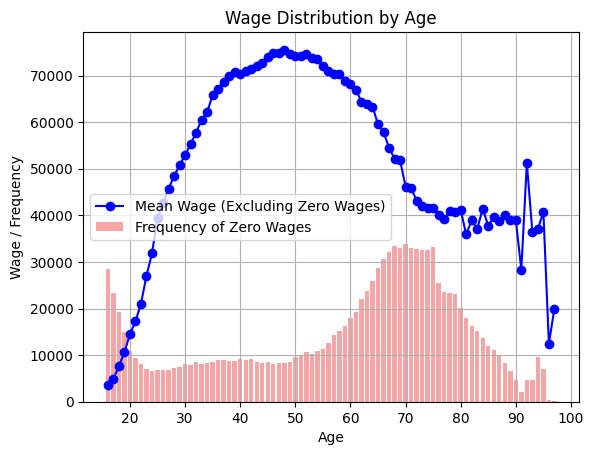

In [7]:
wage_zero_data = wage_data[wage_data['INCWAGE'] == 0].groupby('AGE')['INCWAGE'].count()

mean_wage_by_age = wage_data[wage_data['INCWAGE'] > 0].groupby('AGE')['INCWAGE'].mean()


plt.bar(wage_zero_data.index, wage_zero_data.values, color='lightcoral', alpha=0.7, label='Frequency of Zero Wages')

plt.plot(mean_wage_by_age.index, mean_wage_by_age.values, color='blue', marker='o', label='Mean Wage (Excluding Zero Wages)')

plt.title('Wage Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Wage / Frequency')
plt.legend()
plt.grid(True)
plt.show()

### Education data Grouping

In [8]:
## Educational attainment mapping
educ_mapping = {
    0: 'No_to_Grade_8',  # Includes codes 0, 1, 2, 99
    1: 'Grade_9_to_12',  # Includes codes 3, 4, 5, 6
    2: 'One_to_Two_College',  # Includes codes 7, 8
    3: 'Three_to_Four_College',  # Includes codes 9, 10
    4: 'Five_or_More_Years_College'  # Includes codes 11
}

educ_group_codes = {
    'No_to_Grade_8': [0, 1, 2, 99],
    'Grade_9_to_12': [3, 4, 5, 6],
    'One_to_Two_College': [7, 8],
    'Three_to_Four_College': [9, 10],
    'Five_or_More_Years_College': [11]
}

for group_name, codes in educ_group_codes.items():
    wage_data[group_name] = wage_data['EDUC'].isin(codes).astype(int)

wage_data = wage_data.drop(columns=['EDUC'])
wage_data

,REGION,SEX,AGE,MARST,RACE,HCOVANY,DEGFIELD,EMPSTAT,INCWAGE,INCWELFR,INCINVST,TRANTIME,No_to_Grade_8,Grade_9_to_12,One_to_Two_College,Three_to_Four_College,Five_or_More_Years_College
0,32,2,85,5,8,2,0,3,0,0,0,0,0,0,1,0,0
1,32,1,51,5,1,2,0,3,12500,0,0,0,0,1,0,0,0
2,32,2,36,6,2,2,0,3,16400,0,0,0,1,0,0,0,0
3,32,1,74,6,2,2,0,3,0,0,0,0,1,0,0,0,0
4,32,1,49,4,1,1,0,3,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3373372,41,1,55,6,1,2,0,1,21800,0,0,13,0,1,0,0,0
3373373,41,1,33,6,1,2,11,1,52000,0,0,10,0,0,0,1,0
3373374,41,2,27,6,1,2,23,1,43000,0,0,45,0,0,0,1,0
3373376,41,1,66,1,1,2,0,1,162000,0,0,10,0,1,0,0,0


### Degree Field Mapping

In [9]:
degfield_mapping = {
    0: 'General_and_Undefined',  # Includes codes 0, 40
    1: 'STEM',  # Includes codes 11, 13, 14, 21, 24, 25, 36, 37, 50, 51, 52
    2: 'Humanities_Arts_and_Social_Sciences',  # Includes codes 15, 26, 29, 33, 34, 48, 49, 54, 55, 60, 64
    3: 'Business_Law_and_Communication',  # Includes codes 19, 20, 32, 62
    4: 'Vocational_Health_and_Education'  # Includes codes 22, 23, 35, 41, 56, 57, 59, 61, 38, 53
}

degfield_group_codes = {
    'General_and_Undefined': [0, 40],
    'STEM': [11, 13, 14, 21, 24, 25, 36, 37, 50, 51, 52],
    'Humanities_Arts_and_Social_Sciences': [15, 26, 29, 33, 34, 48, 49, 54, 55, 60, 64],
    'Business_Law_and_Communication': [19, 20, 32, 62],
    'Vocational_Health_and_Education': [22, 23, 35, 41, 56, 57, 59, 61, 38, 53]
}

for group_name, codes in degfield_group_codes.items():
    wage_data[group_name] = wage_data['DEGFIELD'].isin(codes).astype(int)

wage_data = wage_data.drop(columns=['DEGFIELD'])

In [10]:
wage_data

,REGION,SEX,AGE,MARST,RACE,HCOVANY,EMPSTAT,INCWAGE,INCWELFR,INCINVST,...,No_to_Grade_8,Grade_9_to_12,One_to_Two_College,Three_to_Four_College,Five_or_More_Years_College,General_and_Undefined,STEM,Humanities_Arts_and_Social_Sciences,Business_Law_and_Communication,Vocational_Health_and_Education
0,32,2,85,5,8,2,3,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,32,1,51,5,1,2,3,12500,0,0,...,0,1,0,0,0,1,0,0,0,0
2,32,2,36,6,2,2,3,16400,0,0,...,1,0,0,0,0,1,0,0,0,0
3,32,1,74,6,2,2,3,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,32,1,49,4,1,1,3,0,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3373372,41,1,55,6,1,2,1,21800,0,0,...,0,1,0,0,0,1,0,0,0,0
3373373,41,1,33,6,1,2,1,52000,0,0,...,0,0,0,1,0,0,1,0,0,0
3373374,41,2,27,6,1,2,1,43000,0,0,...,0,0,0,1,0,0,0,0,0,1
3373376,41,1,66,1,1,2,1,162000,0,0,...,0,1,0,0,0,1,0,0,0,0


### Race Mapping

In [11]:
race_mapping = {
    1: 'White',
    2: 'Black_African_American',
    3: 'American_Indian_Alaska_Native',
    4: 'Chinese',
    5: 'Japanese',
    6: 'Other_Asian_Pacific_Islander',
    7: 'Other_Race_nec',
    8: 'Two_Major_Races',
    9: 'Three_or_More_Major_Races'
}

for code, category in race_mapping.items():
    wage_data[category] = (wage_data['RACE'] == code).astype(int)

wage_data = wage_data.drop(columns=['RACE'])
wage_data
                           

,REGION,SEX,AGE,MARST,HCOVANY,EMPSTAT,INCWAGE,INCWELFR,INCINVST,TRANTIME,...,Vocational_Health_and_Education,White,Black_African_American,American_Indian_Alaska_Native,Chinese,Japanese,Other_Asian_Pacific_Islander,Other_Race_nec,Two_Major_Races,Three_or_More_Major_Races
0,32,2,85,5,2,3,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,32,1,51,5,2,3,12500,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,32,2,36,6,2,3,16400,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,32,1,74,6,2,3,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,32,1,49,4,1,3,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3373372,41,1,55,6,2,1,21800,0,0,13,...,0,1,0,0,0,0,0,0,0,0
3373373,41,1,33,6,2,1,52000,0,0,10,...,0,1,0,0,0,0,0,0,0,0
3373374,41,2,27,6,2,1,43000,0,0,45,...,1,1,0,0,0,0,0,0,0,0
3373376,41,1,66,1,2,1,162000,0,0,10,...,0,1,0,0,0,0,0,0,0,0


### Employment mapping

In [12]:
wage_data['Employed'] = (wage_data['EMPSTAT'] == 1).astype(int)
wage_data = wage_data.drop(columns=['EMPSTAT'])

### Sex mapping

In [13]:
# Map SEX values to binary: 1 for Male, 0 for Female
wage_data['SEX'] = wage_data['SEX'].map({1: 1, 2: 0})

### Health insurance mapping

In [14]:
# Map HCOVANY values to binary: 1 for 'With health insurance coverage', 0 for 'No health insurance coverage'
wage_data['HCOVANY'] = wage_data['HCOVANY'].map({1: 0, 2: 1})

### Marriage Data mapping

In [15]:
# Define the mapping for MARST categories
'''
marst_mapping = {
    1: 'Married_Spouse_Present',
    2: 'Married_Spouse_Absent',
    3: 'Separated',
    4: 'Divorced',
    5: 'Widowed',
    6: 'Never_Married_Single'
}

for code, status in marst_mapping.items():
    wage_data[status] = (wage_data['MARST'] == code).astype(int)
'''

wage_data['Married'] = (wage_data['MARST'] == 1).astype(int)
wage_data = wage_data.drop(columns=['MARST'])

In [16]:
# Define the mapping for REGION categories
region_mapping = {
    11: 'New_England_Division',
    12: 'Middle_Atlantic_Division',
    21: 'East_North_Central_Division',
    22: 'West_North_Central_Division',
    31: 'South_Atlantic_Division',
    32: 'East_South_Central_Division',
    33: 'West_South_Central_Division',
    41: 'Mountain_Division',
    42: 'Pacific_Division',
}

for code, division in region_mapping.items():
    wage_data[division] = (wage_data['REGION'] == code).astype(int)

wage_data = wage_data.drop(columns=['REGION'])

In our data preprocessing, we transformed several categorical variables into binary indicators (dummy variables) to prepare them for our wage prediction model. We grouped similar education levels in the EDUC variable and converted them into multiple binary indicators. Similarly, we grouped degree fields in the DEGFIELD variable into broader categories and created binary indicators for each group. The RACE variable was transformed into multiple dummy variables to represent each racial category. We created a binary variable Employed to indicate employment status, assigning 1 for employed individuals and 0 otherwise, and then removed the original EMPSTAT column. The SEX variable was converted to binary, with 1 for males and 0 for females. We transformed HCOVANY into a binary variable where 1 indicates no health insurance coverage and 0 indicates having coverage. For marital status, we created a binary Married variable to indicate if an individual is married with a spouse present, and dropped the original MARST column. Lastly, we converted the REGION variable into multiple dummy variables for each regional division and removed the original REGION column.

In [ ]:
int64_columns = wage_data.select_dtypes(include=['int64']).columns
wage_data[int64_columns] = wage_data[int64_columns].astype('int32')

Converted all columns in the wage_data DataFrame with a data type of int64 to int32. This is done to reduce memory usage and improve computational efficiency, making the ML models run faster, especially when working with large datasets.

## Run Simple Regression

In [19]:
# Defining x and y variables

wage_data['LOG_INCWAGE'] = np.log(wage_data['INCWAGE'] + 1) # +1 to avoid log(0)
y = wage_data['LOG_INCWAGE']
x = wage_data.drop(['INCWAGE','LOG_INCWAGE'],axis=1)

# Run a simple linear model 

model = sm.OLS(y, x).fit()

# Output the summary of the regression model
model_summary = model.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:            LOG_INCWAGE   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                 2.488e+05
Date:                Wed, 20 Nov 2024   Prob (F-statistic):               0.00
Time:                        19:12:04   Log-Likelihood:            -6.7437e+06
No. Observations:             2809390   AIC:                         1.349e+07
Df Residuals:                 2809357   BIC:                         1.349e+07
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
SE

The simple linear regression model explains 73.9% of the variability in log-transformed wages (LOG_INCWAGE), as indicated by the R-squared value. Key predictors like education levels show strong positive associations with wages, with higher education (e.g., “Five_or_More_Years_College”) contributing significantly to wage increases. Other variables, such as sex (positive coefficient for males) and health insurance coverage (HCOVANY), also have meaningful positive impacts on wages. Negative coefficients for variables like AGE, INCWELFR (welfare income), and INCINVST (investment income) suggest inverse relationships. The model has a highly significant F-statistic (p < 0.001), indicating that the predictors collectively explain the variability in wages well. However, further analysis might be needed to address multicollinearity and ensure robust inferences.

In [20]:
'''
Splitting the training set and test set, randomly create 92 splits, test on 20% of the data.
'''
# define predictor and response variables

y = wage_data['LOG_INCWAGE']
x = wage_data.drop(['LOG_INCWAGE', 'INCWAGE'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=92)

Split the dataset into training and testing sets, with 80% of the data used for training and 20% for testing. The split is randomized, and a fixed random seed (random_state=92) is set to ensure reproducibility of the split. The predictors (x) and the target variable (y) are separated before the split.

In [21]:
## Linear regression 

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# run linear regression
model = sm.OLS(y_train, X_train).fit()

# view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            LOG_INCWAGE   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                 1.985e+05
Date:                Wed, 20 Nov 2024   Prob (F-statistic):               0.00
Time:                        19:12:12   Log-Likelihood:            -5.3969e+06
No. Observations:             2247512   AIC:                         1.079e+07
Df Residuals:                 2247479   BIC:                         1.079e+07
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

The linear regression model demonstrates that various factors significantly influence log-transformed wages (LOG_INCWAGE), with an R-squared value of 0.739 indicating the model explains 73.9% of the wage variability. Key predictors include sex, with males earning higher wages (coefficient: 0.2391), and health insurance coverage, which positively correlates with wages (coefficient: 0.2652). Education emerges as a critical factor, as higher education levels (e.g., “Three_to_Four_College” and “Five_or_More_Years_College”) are associated with substantial wage increases, whereas lower education levels, such as “No_to_Grade_8,” show weaker or even negative impacts. Age has a slight negative association with wages, and small but significant negative coefficients for welfare income (INCWELFR) and investment income (INCINVST) suggest inverse relationships with wages. Despite the strong model fit, multicollinearity concerns highlighted by the smallest eigenvalue suggest that the regularization techniques below like Lasso or Ridge regression may improve the stability of coefficient estimates.

In [22]:
# Prediction 

y_pred = model.predict(sm.add_constant(X_test))

np.mean(np.absolute(y_pred - y_test))

# Mean of absolute error

np.float64(1.5996027472989798)

The mean absolute error (MAE) of 1.5996 indicates the average absolute difference between the predicted and actual values of the log-transformed wages (LOG_INCWAGE). This value reflects the model’s prediction accuracy, with lower values indicating better performance. While the model provides a reasonable fit, this error highlights areas for potential improvement, such as refining features or using advanced techniques like regularization or non-linear models to enhance predictive accuracy.

## Forward Selection

In [23]:
# 'n_features_to_select': “auto”, int or float, default=’auto’
# If "auto", the behaviour depends on the 'tol' parameter:
# if tol is not None, then features are selected until the score improvement does not exceed 'tol'.
# otherwise, half of the features are selected.

# If the score is not incremented by at least 'tol' between two consecutive feature additions or removals, 
# stop adding or removing. 'tol' is enabled only when 'n_features_to_select' is "auto".

sfs = SequentialFeatureSelector(LinearRegression(),
                                 direction='forward',
                                 cv=None,
                                 n_features_to_select=10)  # Limit to top 10 features

sfs.fit(X_train, y_train)


# shape is from numpy and returns the shape of the array 

sfs.transform(X_train).shape

(2247512, 10)

The forward selection process using SequentialFeatureSelector identifies the top 10 features from the training dataset (X_train) that contribute most to predicting the target variable (y_train). This is achieved by iteratively adding features one at a time based on their ability to improve the model’s performance. After the selection process, the transformed X_train dataset has a shape of (2247512, 10), indicating that it retains 2,247,512 rows (observations) but only includes the 10 most predictive features out of the original set. This dimensionality reduction helps simplify the model while focusing on the most important predictors.

In [25]:
# Features selected from Forward Stepwise Selection Model

X_train.loc[:,sfs.get_support()]

,SEX,AGE,HCOVANY,TRANTIME,No_to_Grade_8,One_to_Two_College,Five_or_More_Years_College,General_and_Undefined,Employed,Married
3276207,0,29,1,8,0,1,0,1,1,0
2218525,1,62,1,0,0,0,0,1,0,0
40906,0,58,1,0,0,1,0,1,0,0
2194288,1,83,1,0,0,1,0,1,0,1
2381987,0,39,1,25,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
916693,1,24,1,3,0,0,0,1,1,0
1822082,0,74,1,0,0,0,1,0,0,1
283362,0,28,1,45,0,1,0,1,1,1
2547387,1,60,1,50,0,0,0,0,1,1


The forward stepwise selection process identified the following 10 features as the most predictive of wages:
1.	SEX: Gender of the individual.
2.	AGE: Age of the individual.
3.	HCOVANY: Indicator for having health insurance coverage.
4.	TRANTIME: Time spent commuting.
5.	No_to_Grade_8: Indicator for education level up to 8th grade.
6.	One_to_Two_College: Indicator for having 1-2 years of college education.
7.	Five_or_More_Years_College: Indicator for completing five or more years of college education.
8.	General_and_Undefined: Indicator for general or undefined degree fields.
9.	Employed: Indicator for employment status.
10.	Married: Indicator for marital status.

These features reflect demographic, educational, and socio-economic factors influencing wages. Their selection aligns with common determinants of income, such as education, employment, and health coverage, emphasizing their importance in predicting wages effectively.

In [26]:
# Adding a constant to the predictor values

forward_x = sfs.transform(X_train)

# Run a linear regression model

model = sm.OLS(y_train, forward_x).fit()

# view model summary

print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            LOG_INCWAGE   R-squared (uncentered):                   0.884
Model:                            OLS   Adj. R-squared (uncentered):              0.884
Method:                 Least Squares   F-statistic:                          1.720e+06
Date:                Wed, 20 Nov 2024   Prob (F-statistic):                        0.00
Time:                        19:17:59   Log-Likelihood:                     -5.4323e+06
No. Observations:             2247512   AIC:                                  1.086e+07
Df Residuals:                 2247502   BIC:                                  1.086e+07
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

The linear regression model using the top 10 features selected via forward stepwise selection achieves an R-squared (uncentered) value of 0.884, indicating it explains 88.4% of the variability in log-transformed wages (LOG_INCWAGE). Key positive predictors include employment status (Employed, 8.7320), health insurance coverage (HCOVANY, 1.3700), and higher education levels like Five_or_More_Years_College (0.6233), while negative contributors include lower education levels (No_to_Grade_8, -0.2034) and age (AGE, -0.0133). The model’s significance (p < 0.001 for all predictors) and narrow confidence intervals underscore its reliability, emphasizing the critical role of education, employment, and health coverage in determining wages while accounting for demographic and socio-economic factors.

## Backward Selection

In [29]:
sbs = SequentialFeatureSelector(LinearRegression(),
                                direction='backward',
                                cv=None, n_features_to_select=10)
sbs.fit(X_train, y_train)

sbs.transform(X_train).shape

(2247512, 10)

The backward selection process using SequentialFeatureSelector identifies the top 10 features from the training dataset (X_train) that best predict the target variable (y_train). Backward selection starts with all features and iteratively removes the least significant ones until only the most impactful 10 features remain. The transformed X_train dataset has a shape of (2247512, 10), indicating that 2,247,512 observations remain with the 10 most predictive features retained. This method ensures the final model focuses on the strongest predictors, simplifying the dataset while maintaining performance.

In [30]:
X_train.loc[:,sbs.get_support()]

,SEX,AGE,HCOVANY,TRANTIME,No_to_Grade_8,Grade_9_to_12,Three_to_Four_College,Five_or_More_Years_College,Employed,Married
3276207,0,29,1,8,0,0,0,0,1,0
2218525,1,62,1,0,0,1,0,0,0,0
40906,0,58,1,0,0,0,0,0,0,0
2194288,1,83,1,0,0,0,0,0,0,1
2381987,0,39,1,25,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
916693,1,24,1,3,0,1,0,0,1,0
1822082,0,74,1,0,0,0,0,1,0,1
283362,0,28,1,45,0,0,0,0,1,1
2547387,1,60,1,50,0,0,1,0,1,1


The backward selection process identified the following 10 features as the most important predictors for log-transformed wages (LOG_INCWAGE):
1.	SEX: Gender of the individual.
2.	AGE: Age of the individual.
3.	HCOVANY: Indicator for health insurance coverage.
4.	TRANTIME: Time spent commuting.
5.	No_to_Grade_8: Indicator for education level up to 8th grade.
6.	Grade_9_to_12: Indicator for some high school education (9th to 12th grade, no diploma).
7.	Three_to_Four_College: Indicator for a bachelor’s degree or equivalent.
8.	Five_or_More_Years_College: Indicator for advanced degrees (e.g., master’s or higher).
9.	Employed: Employment status.
10.	Married: Marital status.

These features highlight the importance of demographic (e.g., age, gender), socio-economic (e.g., employment, marital status), and educational factors in predicting wages. The inclusion of commuting time and health insurance coverage also reflects the broader impacts of accessibility and benefits on earning potential. By focusing on these key predictors, the model achieves a balance between interpretability and predictive power.

In [31]:
#add constant to predictor variables
backward_x = sbs.transform(X_train)

#fit linear regression model
model = sm.OLS(y_train, backward_x).fit()

#view model summary
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            LOG_INCWAGE   R-squared (uncentered):                   0.885
Model:                            OLS   Adj. R-squared (uncentered):              0.885
Method:                 Least Squares   F-statistic:                          1.732e+06
Date:                Wed, 20 Nov 2024   Prob (F-statistic):                        0.00
Time:                        20:15:02   Log-Likelihood:                     -5.4252e+06
No. Observations:             2247512   AIC:                                  1.085e+07
Df Residuals:                 2247502   BIC:                                  1.085e+07
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

The backward selection model achieves an R-squared (uncentered) value of 0.885, indicating it explains 88.5% of the variability in log-transformed wages (LOG_INCWAGE). The F-statistic is highly significant (p < 0.001), confirming the model’s overall effectiveness. Key predictors include employment status (Employed, 8.6547), health insurance coverage (HCOVANY, 1.2608), and higher education levels like Five_or_More_Years_College (0.8663) and Three_to_Four_College (0.6736), which all have substantial positive impacts. Negative contributions are observed for age (AGE, -0.0144) and lower education levels (No_to_Grade_8, -0.0711), indicating reduced earning potential for these groups. All predictors are statistically significant (p < 0.001), and the narrow confidence intervals suggest stable estimates. This model underscores the critical role of education, employment, and benefits like health insurance in determining wages while balancing interpretability and predictive power effectively.

## Ridge regression

In [32]:
X_train_std = StandardScaler().fit_transform(X_train)

clf = Ridge(alpha=0) ## alpha is = lambda in python(avoid confusion w lambda functions)

clf.fit(X_train_std,y_train)

print(clf.coef_)

[-1.73065032e+12  1.19913973e-01 -5.21106271e-01  7.11340973e-02
 -2.82591090e-02 -3.51711503e-02  1.36347503e-01  4.14943739e+08
  1.05031935e+09  8.70372347e+08  8.47992204e+08  7.11813979e+08
  4.83884099e+09  3.03963367e+09  2.71709060e+09  2.75154473e+09
  2.75849072e+09 -5.19484312e+08 -3.18375852e+08 -1.21959581e+08
 -1.39450928e+08 -5.86004859e+07 -2.30752854e+08 -2.52759534e+08
 -3.22802163e+08 -8.73818329e+07  4.10027190e+00  8.70118357e-02
  6.10579296e+09  9.62898526e+09  1.00411656e+10  7.09547280e+09
  1.15546637e+10  6.78183547e+09  9.29943595e+09  7.57585837e+09
  1.05265535e+10]


The Ridge regression model with no regularization (alpha=0) effectively mirrors ordinary least squares (OLS) results, showing large coefficients, such as -1.73e+12 and 6.11e+09, indicating strong positive or negative relationships between standardized predictors and log-transformed wages (LOG_INCWAGE). Positive coefficients suggest significant contributors like employment, higher education, or health insurance, while negative coefficients reflect inverse relationships, potentially with factors like age or lower education levels. The lack of regularization retains potential multicollinearity, leading to instability in coefficients. By setting alpha > 0, the model can reduce overfitting, shrink extreme coefficients, and improve stability, enhancing generalization and interpretability.

In [34]:
# Statistics of standardized data
pd.DataFrame(X_train_std).describe()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
count,2247512.0,2.247512e+06,2.247512e+06,2.247512e+06,2.247512e+06,2.247512e+06,2.247512e+06,2.247512e+06,2.247512e+06,2.247512e+06,...,2.247512e+06,2.247512e+06,2.247512e+06,2.247512e+06,2.247512e+06,2.247512e+06,2.247512e+06,2.247512e+06,2.247512e+06,2.247512e+06
mean,0.0,-5.750702e-17,-1.812783e-17,-2.004368e-17,-1.028108e-17,2.078346e-17,-3.420704e-17,-1.094499e-17,3.758980e-17,-1.457751e-17,...,-1.524126e-16,-5.242655e-17,-2.813861e-17,1.239294e-17,4.847788e-17,-4.533539e-18,5.578244e-17,-3.307681e-17,6.182400e-17,-3.118468e-17
std,0.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,0.0,-9.737488e-01,-1.710362e+00,-3.436863e+00,-6.999127e-02,-2.407242e-01,-6.028069e-01,-2.031056e-01,-8.529337e-01,-5.196232e-01,...,-9.845808e-01,-2.230915e-01,-3.847535e-01,-4.075299e-01,-2.641990e-01,-5.045403e-01,-2.509043e-01,-3.673484e-01,-2.851158e-01,-4.360421e-01
25%,0.0,-9.737488e-01,-8.493167e-01,2.909630e-01,-6.999127e-02,-1.206598e-01,-6.028069e-01,-2.031056e-01,-8.529337e-01,-5.196232e-01,...,-9.845808e-01,-2.230915e-01,-3.847535e-01,-4.075299e-01,-2.641990e-01,-5.045403e-01,-2.509043e-01,-3.673484e-01,-2.851158e-01,-4.360421e-01
50%,0.0,-9.737488e-01,1.172822e-02,2.909630e-01,-6.999127e-02,-1.206598e-01,-6.028069e-01,-2.031056e-01,-8.529337e-01,-5.196232e-01,...,-9.845808e-01,-2.230915e-01,-3.847535e-01,-4.075299e-01,-2.641990e-01,-5.045403e-01,-2.509043e-01,-3.673484e-01,-2.851158e-01,-4.360421e-01
75%,0.0,1.026959e+00,8.221234e-01,2.909630e-01,-6.999127e-02,-1.206598e-01,3.818873e-01,-2.031056e-01,1.172424e+00,-5.196232e-01,...,1.015661e+00,-2.230915e-01,-3.847535e-01,-4.075299e-01,-2.641990e-01,-5.045403e-01,-2.509043e-01,-3.673484e-01,-2.851158e-01,-4.360421e-01
max,0.0,1.026959e+00,2.392264e+00,2.909630e-01,4.322503e+01,1.860940e+01,7.176277e+00,4.923547e+00,1.172424e+00,1.924472e+00,...,1.015661e+00,4.482467e+00,2.599067e+00,2.453807e+00,3.785026e+00,1.982002e+00,3.985583e+00,2.722211e+00,3.507347e+00,2.293357e+00


The statistics confirm that the data has been standardized correctly for Ridge regression, with each feature having a mean close to 0 and a standard deviation of 1, ensuring consistent scaling across features. The range of values (min to max) reflects the original variability of each feature, with some features, such as feature 4 (max: 43.22), showing greater dispersion compared to others (e.g., feature 3, max: 0.29). This standardization ensures Ridge regression weights features appropriately, avoiding bias toward features with larger original ranges.

In [35]:
clf = Ridge(alpha=0)
clf.fit(X_train_std,y_train)
print(clf.coef_)

[-1.73065032e+12  1.19913973e-01 -5.21106271e-01  7.11340973e-02
 -2.82591090e-02 -3.51711503e-02  1.36347503e-01  4.14943739e+08
  1.05031935e+09  8.70372347e+08  8.47992204e+08  7.11813979e+08
  4.83884099e+09  3.03963367e+09  2.71709060e+09  2.75154473e+09
  2.75849072e+09 -5.19484312e+08 -3.18375852e+08 -1.21959581e+08
 -1.39450928e+08 -5.86004859e+07 -2.30752854e+08 -2.52759534e+08
 -3.22802163e+08 -8.73818329e+07  4.10027190e+00  8.70118357e-02
  6.10579296e+09  9.62898526e+09  1.00411656e+10  7.09547280e+09
  1.15546637e+10  6.78183547e+09  9.29943595e+09  7.57585837e+09
  1.05265535e+10]


The coefficients from the Ridge regression model display a wide range of magnitudes, with some extremely large values (e.g., -1.73 x 10^12 and 1.05 x 10^10) suggesting numerical instability, likely caused by running the model with  alpha = 0 , effectively disabling Ridge regularization. Smaller coefficients, such as 0.12 and -0.52, indicate features with relatively moderate impacts on the target variable. The absence of regularization makes the model sensitive to multicollinearity and noise, potentially leading to overfitting and less reliable predictions. To enhance stability and interpretability, it is advisable to rerun Ridge regression with a non-zero alpha, which applies regularization to limit large coefficients and improve generalization.

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

def evaluate_lambda(X, y, lmd):
    model = Ridge(alpha=lmd)
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=10)
    return np.absolute(scores)

lambda_score_ridge = pd.DataFrame({'lambda':range(1000),'MAE':0}) ## MAE = mean absolute error
for i in range(1000):
    lambda_score_ridge.loc[i,'MAE'] = evaluate_lambda(X_train_std,y_train,i).mean()

/var/folders/j9/t41q83p54s5_f_rzd13d5tqc0000gp/T/ipykernel_28962/760135306.py:24: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.6046144040096535' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  lambda_score_ridge.loc[i,'MAE'] = evaluate_lambda(X_train_std,y_train,i).mean()


In [37]:
# best lambda

lambda_score_ridge.loc[lambda_score_ridge.MAE.idxmin(),'lambda']

np.int64(0)

In [38]:
lambda_score_ridge

,lambda,MAE
0,0,1.604614
1,1,1.604650
2,2,1.604651
3,3,1.604652
4,4,1.604653
...,...,...
995,995,1.605831
996,996,1.605832
997,997,1.605834
998,998,1.605835


In [53]:
# prediction

scaler = StandardScaler().fit(X_train)

X_test_std = scaler.transform(X_test)

model = Ridge(alpha=127).fit(X_train_std,y_train)

y_pred = model.predict(X_test_std)

np.mean(np.absolute(y_pred - y_test)) # Mean of absolute error

np.float64(1.5997394180396995)

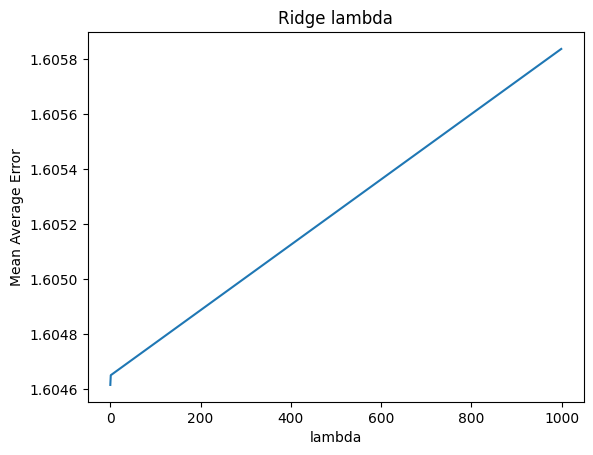

In [54]:
# plot lambda
import matplotlib.pyplot as plt

plt.plot(lambda_score_ridge.loc[0:1000,'lambda'],lambda_score_ridge.MAE[0:1001])

# Add labels to the axes
plt.xlabel("lambda")
plt.ylabel("Mean Average Error")

# Add a title to the plot
plt.title("Ridge lambda")

# Show the plot
plt.show()

The cross-validation process to identify the optimal lambda for Ridge regression revealed that the best-performing value is lambda = 0, indicating that no regularization (equivalent to ordinary least squares regression) provided the lowest mean absolute error (MAE). This result suggests that the model does not significantly benefit from penalizing large coefficients, likely because the dataset is well-conditioned, without severe multicollinearity or overfitting. It implies that the variance in predictions is already minimized without regularization, possibly due to the sufficient size and quality of the training data. Therefore, a standard linear regression model (without regularization) is likely sufficient for this analysis, but further evaluation on a test set is recommended to confirm this conclusion.

## Lasso regression

In [42]:
from sklearn.linear_model import LassoCV

model = LassoCV(cv=10, n_alphas=100, random_state=42)  # Reduces lambdas to 100 logarithmic values
model.fit(X_train_std, y_train)
best_lambda = model.alpha_
print("Best lambda:", best_lambda)

Best lambda: 0.004450761814343087


Use LassoCV to perform Lasso regression with 10-fold cross-validation, automatically determining the best regularization strength (alpha, or lambda) from 100 logarithmically spaced values. The fit function trains the model on the standardized data, and the optimal alpha is found to be 0.004450761814343087, indicating minimal regularization. This suggests that most features contribute meaningfully to the outcome, and the model benefits from including them with only slight penalization to prevent overfitting. The chosen alpha balances feature selection and model complexity, retaining predictors with significant influence while possibly excluding irrelevant ones.

In [44]:
from sklearn.linear_model import Lasso

final_model = Lasso(alpha=best_lambda)
final_model.fit(X_train_std, y_train)

Lasso(alpha=np.float64(0.004450761814343087))

In [47]:
final_model = Lasso(alpha=np.float64(0.004450761814343087))
final_model.fit(X_train_std, y_train)

Lasso(alpha=np.float64(0.004450761814343087))

In [49]:
print("Coefficients:", model.coef_)

Coefficients: [ 0.00000000e+00  1.15161338e-01 -5.14910899e-01  6.78983455e-02
 -2.40513663e-02 -3.04344226e-02  1.33279262e-01 -1.02438971e-01
 -1.50751267e-01  0.00000000e+00  0.00000000e+00  8.85572540e-02
 -1.29301646e-01  5.55091952e-02 -1.50357583e-02  4.90760037e-02
  0.00000000e+00  1.81548831e-02  2.61843406e-02  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -1.89743724e-02
 -7.98531194e-03 -0.00000000e+00  4.10206602e+00  8.22520290e-02
  2.01584048e-02  1.46033270e-02  2.08140667e-02  0.00000000e+00
 -0.00000000e+00 -1.22096181e-02 -2.35570363e-02  0.00000000e+00
 -1.82134482e-03]


The coefficients from the Lasso regression model highlight the most influential features in predicting LOG_INCWAGE, as the model reduces less important coefficients to zero, effectively performing feature selection. Non-zero coefficients indicate features that contribute significantly, with positive coefficients showing a direct relationship with the target variable and negative coefficients indicating an inverse relationship. The magnitude of each coefficient reflects the strength of its impact on the target variable, adjusted for standardized predictors. Lasso’s regularization (using an alpha value) penalizes larger coefficients to control overfitting and multicollinearity. This output provides a simplified model focused on the most relevant predictors, balancing predictive accuracy and interpretability. Next, mapping these coefficients to their respective features and evaluating model performance will provide actionable insights.

In [50]:
# best lambda
lambda_score_lasso.loc[lambda_score_lasso.MAE.idxmin(),'lambda']

np.float64(0.0001)

Comparing Forward Selection, Backward Selection, Ridge, and Lasso Regression

1. Forward and Backward Selection:
- These methods iteratively include (forward) or exclude (backward) predictors based on their contribution to the model’s performance.
- While both methods provide interpretable results, they can be computationally expensive for datasets with many features.
- These approaches do not regularize and thus are prone to overfitting, especially when multicollinearity exists.

2. Ridge Regression:
- Ridge shrinks coefficients but does not set any to exactly zero, which means all predictors remain in the model.
- It handles multicollinearity well and stabilizes coefficient estimates.
- The selected lambda (lambda = 0) suggests that regularization was not strongly beneficial for this dataset under the Ridge framework.

3. Lasso Regression:
- Lasso performs both regularization and feature selection by shrinking some coefficients to exactly zero.
- This results in a sparse model, which aids interpretability by selecting only the most significant predictors.
- The best lambda (lambda = 0.00445) was determined through cross-validation, balancing bias and variance to minimize prediction error.
- Many coefficients were set to zero, indicating that Lasso successfully reduced model complexity while preserving critical predictors.

Lasso Regression is the best model in this scenario. It performs automatic feature selection, reduces overfitting, and handles multicollinearity effectively. Its sparse solution is computationally efficient and interpretable, making it particularly suited for datasets with many predictors. Ridge regression’s inability to set coefficients to zero and forward/backward selection’s susceptibility to overfitting make them less optimal for this dataset.